In [10]:
!pip install konlpy

In [11]:
pip install tweepy==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install wordcloud

In [42]:
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'


font_path = 'NanumBarunGothic.ttf'
font= fm.FontProperties(fname=font_path, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

In [6]:
#wine review data 불러오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

Location= 'C:\\Users\\User\\Documents'
File='wine_review_data.xlsx'

# Row=10
Column=17

data_pd=pd.read_excel('{}/{}'.format(Location, File),
                     header=None, index_col=None, names=None)
data_np=pd.DataFrame.to_numpy(data_pd)

reviews=[]
for Row in range(1,11):
    reviews.append(data_np[Row][Column])
        
print(reviews)

['남다른 숙성도, 풍부하며 탄탄한 구조감을 지닌 풀바디의 샴페인', '농축된 부케가 뒤를 받쳐주며 잘 익은 과육에서 오는 구조감, 달콤한 탄닌이 입맛을 자극하는 와인', '분홍계열의 오렌지 빛깔을 띠며 바이올렛과 후추의 향신료 아로마향의 와인', '드라이해서 좋았다', '탄산감도 적당해서 좋았던 것 같아요.', '기념일이나 기분 좋은 날 까볼만히다.', '입 안 가득 전해지는 뛰어난 기포감과 단단한 구조감', '풍부한 과실과 풍미가 안정적인 미감을 형성', '작은 기포가 지속력있게 올라온다', '부드럽고 우아한 풍미와 신선하고 깔끔한 맛이 매력적/ 기포감이 물리지 않고 산뜻한을 줍니다']


In [7]:
#불용어를 제외하고 형태소 분석을 이용해 명사 추출
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

stop_words="와인 샴페인 잔 전체 복합 노트 특징 요소 느낌 계열 가격 품질 활용 부여 자랑 모습 내기 스타일 컬러 한마디 매력 만족 추천 최고 완벽 전반 최상 일품 인상 대표 예술 환상 다양 고유 기분 풀 입안 블랙 검정 블루 다크 루비 루비색 뒷맛 각종 듯 맛 향 후 입 혀 안 뒤 끝 빛 색 수 것 류 가넷 레드 레드와인 붉은색 등 롱 거 분 때 중 이것 날 목 미 속 간 만 셋 백단 제공 터치 약간 크뤼 네비올로 브리 노즈 트리 여과 강인 표현 은근 견고 집중 집중력 쌈 시간 미세기 보장 정제 가미 진행 메를로 시라 전달 형성 동반 합리 어디 생각 특유 나 저 하루 해요"
stop_words = stop_words.split(' ')

nouns=[]
keyword=[]
    
for review in reviews:
  for noun in mecab.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)
keyword.append(nouns)

keyword

[['숙성',
  '구조감',
  '바디',
  '농축',
  '부케',
  '과육',
  '구조감',
  '달콤',
  '탄닌',
  '입맛',
  '자극',
  '분홍',
  '오렌지',
  '빛깔',
  '바이올렛',
  '후추',
  '향신료',
  '아로마',
  '드라이',
  '탄산',
  '기념일',
  '기포',
  '구조감',
  '과실',
  '풍미',
  '안정',
  '미감',
  '기포',
  '지속력',
  '풍미',
  '신선',
  '기포']]

In [8]:
#단어 빈도수 측정
from collections import Counter

nouns_counter = Counter(nouns)
top_nouns=dict(nouns_counter.most_common(50))

top_nouns

{'구조감': 3,
 '기포': 3,
 '풍미': 2,
 '숙성': 1,
 '바디': 1,
 '농축': 1,
 '부케': 1,
 '과육': 1,
 '달콤': 1,
 '탄닌': 1,
 '입맛': 1,
 '자극': 1,
 '분홍': 1,
 '오렌지': 1,
 '빛깔': 1,
 '바이올렛': 1,
 '후추': 1,
 '향신료': 1,
 '아로마': 1,
 '드라이': 1,
 '탄산': 1,
 '기념일': 1,
 '과실': 1,
 '안정': 1,
 '미감': 1,
 '지속력': 1,
 '신선': 1}

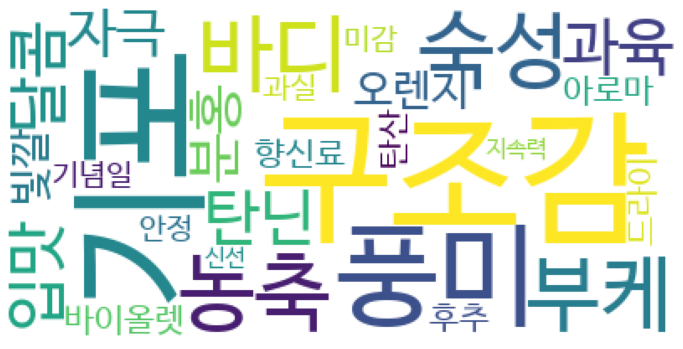

In [9]:
#단어 시각화
from wordcloud import WordCloud

wc= WordCloud(background_color='white', font_path='NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

figure=plt.figure(figsize=(12,12))
ax=figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()

In [132]:
#입력 키워드, 리뷰 단어 매칭
input1=['분위기', '파티', '이벤트', '고급', '기념일', '여자친구', '생일', '연인', '부부','혼술']
input2=['기포', '샴페인', '탄산', '거품']
input3=['입문', '데일리', '최애', '최고', '입문자', '입문자용', '균형', '밸런스', '조화', '균형감', '궁합']
input4=['가성비']
input5=['풍미', '농축', '숙성', '깊이', '고급', '마무리', '여운', '피니시', '피니쉬', '지속력', '지속', '마지막']
input6=['블랙커런트', '딸기', '살구', '블루베리', '포도', '향기', '자두', '아로마', '베리', '체리', '과실', '블랙베리', '과일향', '라즈베리', '꽃향기', '과일', '석류', '향수', '과육', '복숭아', '배', '시트러스', '오렌지', '레몬', '카시스', '플로럴', '열대과일', '무화과']
input7=['탄닌', '타닌']
input8=['스파이시', '허브', '민트']
input9=['선명', '드라이']
input10=['단맛', '당도', '꿀', '달콤', '당', '허니']
input11=['버터', '크리미', '실키', '미네랄']
input12=['바디', '구조', '질감', '견고', '텍스쳐', '텍스처', '밀도', '구조감', '탄력' , '바디감']
input13=['산미', '산도', '신맛' ]
input14=['고기', '안심', '육류', '스테이크', '송아지']
input15=['페스트리', '디저트', '치즈케이크', '초콜릿','케이크']
input16=['블루치즈,' '크림치즈', '치즈']
input17=['해산물']

total_cnt=[]

for keyword in keywords:
    cnt=0
    for n in keyword:
        if n in input17:
            cnt+=1
    print(cnt)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0


In [13]:
print('========================================================================')

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

Location= 'C:\\Users\\User\\Documents'
File='wine_review_data.xlsx'

# Row=10
# Column=29

data_pd=pd.read_excel('{}/{}'.format(Location, File),
                     header=None, index_col=None, names=None)
data_np=pd.DataFrame.to_numpy(data_pd)

totals=[]
# print(data_pd)
for Column in range(30):
    reviews=[]
    for Row in range(1,11):
        reviews.append(data_np[Row][Column])
    totals.append(reviews)

# print(a)
print(totals)
# for Column in range(1,30):
    
# for Column in range(1,30):
#     for Row in range(1,11):
#         reviews.append(data_np[Row][Column])

# print(reviews)

[['스파이시 오크 카라멜 바닐라', '밸런스가 매우 좋았습니다. ', '부드러운 탄닌감과 과일향이 너무 좋았음.', '바디감 풍부합니다.', '풀 바디감이 훌륭했어요', '아름다운 밸런스네요.', '블랙베리, 블랙체리, 매화로 열립니다.', '카시스, 후추, 유칼립투스와 바닐라의 맛과 향이 느껴집니다.', '전체적인 구조감이 탄탄하다.', '밸런스가 아주 좋은 와인이다'], ['블랙베리와 블랙커런트의 강렬한 검은 과일 향', '복합적인 우디향과 어우러져 매혹적이고 고급스럽다', '산뜻한 산미', '탄닌에서 오는 단단한 구조감', '오크의 달콤함과 마지막 피니시에는 감미로움', '강렬하고 깊이 있으면서도 예리함을 놓치지 않는 와인', '드라이하며 고기와 잘 어울림', '육류와 잘 어울린다', '복합적인 향이 매력적인 와인', '드라이한 맛이 좋은 와인'], ['상큼하고 아주 많이 떫어요', '클래식한 탄닌을 보여준다.', '탄닌이 강렬하고 풍미가 있다.', '탄닌이 있고 거칠고 떫은 맛을 가지고 있습니다', '한마디로 깊고 긴 블랙베리, 블랙커런트, 카시스, 스모크 향이 어우러져 맛있다', '어떤 산미보다 훨씬 더 잘 익고 과일이 풍부', '깊은 풍미를 지닌 와인이다.', '스파이시하지만 크리미한 오크 특징이 매혹적인 질감과 구조감과 조화를 이룬다. ', '야생 블랙베리, 블랙커런트, 신선한 딸기 향', '바닐라, 흙내음 노트와 라벤더를 비롯한 좋은 꽃내음 아로마와 함께 잘 어우러'], ['비싼 와인, 안심과 어울려요', '풍부한 바디감에 만족합니다', '부드러운 목넘김과 드라이함이 매력적이네요', '산미감이 풍부합니다', '짙은 루비빛을 띈다.', '입안 가득 느껴지는 강한 바디감이 있다.', '커피, 코코아향과 함께 부드러운 뒷맛이 좋다.', '블루베리향, 향신료향, 초콜릿 향이 매혹적인 와인이다.', '부드럽고 대담하며 맛있습니다.', '부드러운 탄닌, 긴 마무리, 오크, 균형잡힌 밸런스가 멋지다.'], ['짙은 루비빛을 띠고 초콜릿, 블루베리향이 향긋하

In [60]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

stop_words="와인 샴페인 잔 전체 복합 노트 특징 요소 느낌 계열 가격 품질 활용 부여 자랑 모습 내기 스타일 컬러 한마디 매력 만족 추천 최고 완벽 전반 최상 일품 인상 대표 예술 환상 다양 고유 기분 풀 입안 블랙 검정 블루 다크 루비 루비색 뒷맛 각종 듯 맛 향 후 입 혀 안 뒤 끝 빛 색 수 것 류 가넷 레드 레드와인 붉은색 등 롱 거 분 때 중 이것 날 목 미 속 간 만 셋 백단 제공 터치 약간 크뤼 네비올로 브리 노즈 트리 여과 강인 표현 은근 견고 집중 집중력 쌈 시간 미세기 보장 정제 가미 진행 메를로 시라 전달 형성 동반 합리 어디 생각 특유 나 저 하루 해요"
stop_words = stop_words.split(' ')


keywords=[]

for total in totals:
    nouns=[]
    for review in total:
        for noun in mecab.nouns(review):
            if noun not in stop_words:
                nouns.append(noun)
    keywords.append(nouns)

keywords

[['스파이시',
  '오크',
  '카라멜',
  '바닐라',
  '밸런스',
  '탄닌',
  '과일향',
  '바디',
  '바디',
  '밸런스',
  '블랙베리',
  '체리',
  '매화',
  '카시스',
  '후추',
  '유칼립투스',
  '바닐라',
  '구조',
  '밸런스'],
 ['블랙베리',
  '블랙커런트',
  '과일',
  '우디',
  '매혹',
  '고급',
  '산미',
  '탄닌',
  '구조감',
  '오크',
  '마지막',
  '피니시',
  '감미로움',
  '드라이',
  '고기',
  '육류',
  '드라이'],
 ['클래식',
  '탄닌',
  '탄닌',
  '풍미',
  '탄닌',
  '블랙베리',
  '블랙커런트',
  '카시스',
  '스모크',
  '산미',
  '과일',
  '풍미',
  '스파이시',
  '크리미',
  '오크',
  '매혹',
  '질감',
  '구조감',
  '조화',
  '야생',
  '블랙베리',
  '블랙커런트',
  '딸기',
  '바닐라',
  '흙내음',
  '라벤더',
  '꽃내음',
  '아로마'],
 ['안심',
  '바디',
  '드라이',
  '산미',
  '바디',
  '커피',
  '코코아',
  '베리향',
  '향신료',
  '초콜릿',
  '매혹',
  '대담',
  '탄닌',
  '마무리',
  '오크',
  '균형',
  '밸런스'],
 ['초콜릿',
  '베리향',
  '카시스',
  '블루베리',
  '초콜릿',
  '탄닌',
  '텍스쳐',
  '여운',
  '드라이',
  '바디',
  '분위기',
  '밸런스',
  '숙성',
  '향기',
  '드라이',
  '매혹',
  '산미',
  '탄닌',
  '바디',
  '조화'],
 ['블랙커런트',
  '자두',
  '스파이시',
  '아로마',
  '블랙베리',
  '블루베리',
  '바이올렛',
  '균형',
  '구조감',
  '탄닌',
  '피니시',
  '가성비',
  '바디',
 

In [12]:
category=[['분위기', '파티', '이벤트', '고급', '기념일', '여자친구', '생일', '연인', '부부','혼술'],
          ['기포', '샴페인', '탄산', '거품'],
          ['입문', '데일리', '최애', '최고', '입문자', '입문자용', '균형', '밸런스', '조화', '균형감', '궁합'],
          ['가성비'],
          ['풍미', '농축', '숙성', '깊이', '고급', '마무리', '여운', '피니시', '피니쉬', '지속력', '지속', '마지막'],
          ['블랙커런트', '딸기', '살구', '블루베리', '포도', '향기', '자두', '아로마', '베리', '체리', '과실', '블랙베리', '과일향', '라즈베리', '꽃향기', '과일', '석류', '향수', '과육', '복숭아', '배', '시트러스', '오렌지', '레몬', '카시스', '플로럴', '열대과일', '무화과'],
          ['탄닌', '타닌'],
          ['스파이시', '허브', '민트'],
          ['선명', '드라이'],
          ['단맛', '당도', '꿀', '달콤', '당', '허니'],
          ['버터', '크리미', '실키', '미네랄'],
          ['바디', '구조', '질감', '견고', '텍스쳐', '텍스처', '밀도', '구조감', '탄력' , '바디감'],
          ['산미', '산도', '신맛' ],
          ['고기', '안심', '육류', '스테이크', '송아지'],
          ['페스트리', '디저트', '치즈케이크', '초콜릿','케이크'],
          ['블루치즈,' '크림치즈', '치즈'],
          ['해산물']]

total_cnt=[]

for keyword in keywords:
    cnt=[]
    cnt_int=0
    for i in category:
        for j in range(len(i)):
            for k in range(len(keyword)):
                if i[j] in keyword[k]:
#                     print('i[',j,'=',i[j])
#                     print('keyword[',k,']=',keyword[k])
#                     cnt_int=cnt_int+1
#                     cnt.append(cnt_int)
#     total_cnt.append(cnt)

# total_cnt
#             if i in keyword:
#             cnt+=1
        
#     print(cnt)
#             cnt +=1
# #         print(cnt)
#     total_cnt.append(cnt)
# print(total_cnt) 

SyntaxError: unexpected EOF while parsing (<ipython-input-12-c9416c879184>, line 42)

In [1]:
with open("C:/mecab/user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '스파이시,,,,NNP,*,F,스파이시,*,*,*,*,*\n',
 '과일향,,,,NNP,*,F,과일향,*,*,*,*,*\n',
 '피니쉬,,,,NNP,*,F,피니쉬,*,*,*,*,*\n',
 '가성비,,,,NNP,*,F,가성비,*,*,*,*,*\n',
 '베리향,,,,NNP,*,F,베리향,*,*,*,*,*\n',
 '카시스,,,,NNP,*,F,카시스,*,*,*,*,*\n',
 '구조감,,,,NNP,*,F,구조감,*,*,*,*,*\n',
 '텍스쳐,,,,NNP,*,F,텍스쳐,*,*,*,*,*\n']

In [2]:
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '스파이시,1786,3545,2953,NNP,*,F,스파이시,*,*,*,*,*\n',
 '과일향,1786,3545,2953,NNP,*,F,과일향,*,*,*,*,*\n',
 '피니쉬,1786,3545,2953,NNP,*,F,피니쉬,*,*,*,*,*\n',
 '가성비,1786,3545,2953,NNP,*,F,가성비,*,*,*,*,*\n',
 '베리향,1786,3545,2953,NNP,*,F,베리향,*,*,*,*,*\n',
 '카시스,1786,3545,2953,NNP,*,F,카시스,*,*,*,*,*\n',
 '구조감,1786,3545,2953,NNP,*,F,구조감,*,*,*,*,*\n',
 '텍스쳐,1786,3545,2953,NNP,*,F,텍스쳐,*,*,*,*,*\n']

In [7]:
file_data.append('텍스쳐,,,,NNP,*,F,텍스쳐,*,*,*,*,*\n')
with open("C:/mecab/user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)

In [6]:
file_data.append('스파이시,,,,NNP,*,F,스파이시,*,*,*,*,*\n')
with open("C:/mecab/user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)

In [4]:
file_data.append('과일향,,,,NNP,*,F,과일향,*,*,*,*,*\n')
with open("C:/mecab/user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)

In [5]:
file_data[2]='과일향,,,0,NNP,*,F,과일향,*,*,*,*,*\n'
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '과일향,,,0,NNP,*,F,과일향,*,*,*,*,*\n',
 '과일향,,,,NNP,*,F,과일향,*,*,*,*,*\n']